In [1]:
import warnings
warnings.filterwarnings("ignore")

import os, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, glob
from pynwb import NWBHDF5IO
from pathlib import Path
from convnwb.io import load_nwbfile
from scipy.ndimage import gaussian_filter1d

import sys
sys.path.append('../code/ephys_qc')

from ephys_utills import get_et_timebins, compute_pixelperDVA, et_heatmap
import cv2, torch

In [2]:
sess_files = sorted(glob.glob('../data/000623/sub-CS53*/*.nwb'))
for sess_file in sess_files:
    nwbfile, io = load_nwbfile(os.path.basename(sess_file), os.path.dirname(sess_file), return_io=True)
    break
nwbfile

Data type,int64
Shape,"(603,)"
Array size,4.71 KiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(603,)"
Array size,4.71 KiB
Chunk shape,None


In [3]:
SEC2MSEC = 1000.
nwb_input_dir = '../data/000623/'

# ----- Basic metadata info about the video stimulus -----
frame_width, frame_height, vid_fps, nframes = 640, 480, 25.0, 11971

frame_duration_msec = SEC2MSEC / vid_fps
framesize = [frame_width, frame_height]

# define a duration to timebin the ET data
########################################################################################################################################################################## divided by vid_fps
timebin_sec = 1.0/vid_fps # define here as sec. used for saving results
timebin_msec = timebin_sec * SEC2MSEC # millisec.

nbins = np.round(frame_duration_msec * nframes / timebin_msec).astype(int)

nwb_session_files = sorted(glob.glob(os.path.join(nwb_input_dir, 'sub-*/*.nwb')))

# ----- Read ET (gaze) data from the NWB files -----
etdata_ses = []
pixel_dva_ses = []
missingdata_ratio = []
session_ids_et = []
select_subj_id, i = 0, 0
for session_ii in nwb_session_files:

    if not 'P54CSR1' in session_ii:
        continue

    print(f'processing {os.path.basename(session_ii)}...')

    # Open the NWB file and read its content
    with NWBHDF5IO(session_ii,'r') as nwb_io: 
        nwbfile = nwb_io.read()
        
        session_ids_et.append(nwbfile.identifier)
        
        trials_df = nwbfile.trials.to_dataframe()
        enc_start_time = trials_df[trials_df['stim_phase']=='encoding']['start_time'].values[0]
        enc_stop_time = trials_df[trials_df['stim_phase']=='encoding']['stop_time'].values[0]
        
        gaze_data = nwbfile.processing['behavior']['EyeTracking']['SpatialSeries']
        gaze_xy = np.asarray(gaze_data.data)
        
        if gaze_data.rate is None:
            gaze_time = gaze_data.timestamps
        else:
            gaze_time = np.arange(0,len(gaze_xy))/(gaze_data.rate) + gaze_data.starting_time
        gaze_encoding = np.logical_and(gaze_time >= enc_start_time, 
                                        gaze_time <= enc_stop_time) 
    
        gaze_df = pd.DataFrame(data=np.c_[gaze_time[gaze_encoding],gaze_xy[gaze_encoding,:]],
                                columns=['RecTime','GazeX','GazeY'])    
    
        # get video display info and scale gaze to stimulus size
        display_info_raw = gaze_data.comments
        screen_wh, display_wh, display_area_i = display_info_raw.split('::')
    
        screen_w, screen_h = list(map(float,screen_wh.split('=')[1].split(',')))
        display_w, display_h = list(map(float,display_wh.split('=')[1].split(',')))
        display_area = list(map(float,display_area_i.split('=')[1].split(',')))
    
        _, pixel_dva_mean = compute_pixelperDVA([screen_w,screen_h])
        pixel_dva_ses.append(pixel_dva_mean)
    
        scale_dx = frame_width / display_w
        scale_dy = frame_height / display_h
    
        gaze_df['GazeX'] = (gaze_df['GazeX'] - display_area[0])*scale_dx 
        gaze_df['GazeY'] = (gaze_df['GazeY'] - display_area[1])*scale_dy 
    
        problem_inds_x = np.logical_not(gaze_df['GazeX'].astype(float).between(0,frame_width,
                                                                                inclusive='left'))
        
        problem_inds_y = np.logical_not(gaze_df['GazeY'].astype(float).between(0,frame_height,
                                                                                inclusive='left'))
        problem_inds = np.logical_or(problem_inds_x, problem_inds_y)
        gaze_df.loc[problem_inds,['GazeX','GazeY']] = np.nan
        
        # Downsample gaze data to the video frame rate
        et_xy_binned = get_et_timebins(gaze_df, timebin_msec, do_op=None,
                                        fix_length=True, nbins=nbins, keep_timebin_index=False,
                                        )
        
        et_xy_binned_v = np.vstack(et_xy_binned)
        missingdata_ratio.append(np.isnan(et_xy_binned_v).any(axis=1).sum() / et_xy_binned_v.shape[0])
        
        et_xy_binned = np.asarray(et_xy_binned, dtype=object)
        etdata_ses.append(et_xy_binned)


processing sub-CS54_ses-P54CSR1_behavior+ecephys.nwb...


## resampling gaze data

In [4]:
print(f'et_xy_binned (n_frames, ):', et_xy_binned.shape)
print(f'et_xy_binned[0] (n_samples_per_frame, n_coords):', et_xy_binned[0].shape)

# stack all samples across all frames
et_ts = np.vstack(et_xy_binned)
print('et_ts (n_samples, n_coords):', et_ts.shape)

# take just the last sample from each frame
et_frames = np.array([bin_vals[-1] for bin_vals in et_xy_binned])
print('et_frames (n_frames, n_coords):', et_frames.shape)

et_xy_binned (n_frames, ): (11971,)
et_xy_binned[0] (n_samples_per_frame, n_coords): (20, 2)
et_ts (n_samples, n_coords): (239419, 2)
et_frames (n_frames, n_coords): (11971, 2)


## plotting gaze data

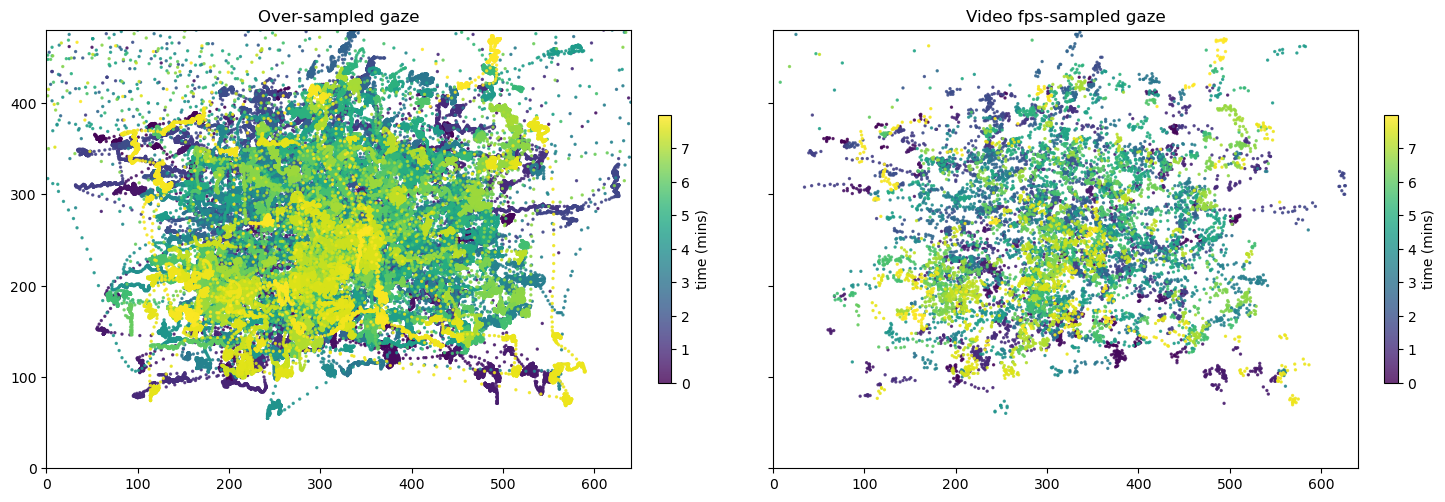

In [5]:
# remove NaNs
et_ts_valid_pts = ~np.isnan(et_ts[:, 0]) & ~np.isnan(et_ts[:, 1])
et_frames_valid_pts = ~np.isnan(et_frames[:, 0]) & ~np.isnan(et_frames[:, 1])

# make time values in minutes
sample_rate = 25  # samples per second
times_ts = np.arange(et_ts.shape[0]) / sample_rate / 20 / 60  # minutes
times_frames = np.arange(et_frames.shape[0]) / sample_rate / 60  # minutes

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)

axs[0].set(title='Over-sampled gaze', xlim=(0, frame_width), ylim=(0, frame_height))
axs[0].set_aspect('equal')
sc0 = axs[0].scatter(et_ts[et_ts_valid_pts, 0], et_ts[et_ts_valid_pts, 1],
                     c=times_ts[et_ts_valid_pts], cmap='viridis', s=2, alpha=0.8)

axs[1].set(title='Video fps-sampled gaze', xlim=(0, frame_width), ylim=(0, frame_height))
axs[1].set_aspect('equal')
sc1 = axs[1].scatter(et_frames[et_frames_valid_pts, 0], et_frames[et_frames_valid_pts, 1],
                     c=times_frames[et_frames_valid_pts], cmap='viridis', s=2, alpha=0.8)

# separate colorbars
cbar0 = plt.colorbar(sc0, ax=axs[0], label='time (mins)', fraction=0.02, pad=0.04)
cbar1 = plt.colorbar(sc1, ax=axs[1], label='time (mins)', fraction=0.02, pad=0.04)

plt.tight_layout()
plt.show()


## object alignment

In [11]:
df = pd.read_parquet('./data_files/bangbangyouredead_v4-1.parquet')
df

,class,class_conf,bbox_xywh
0,[],[],[]
1,[],[],[]
2,[],[],[]
3,[],[],[]
4,[],[],[]
...,...,...,...
14659,[],[],[]
14660,[],[],[]
14661,[],[],[]
14662,[],[],[]


In [25]:
from ultralytics import YOLO
import cv2
from tqdm import tqdm

# Load YOLO model
model = YOLO('yolov8s.pt')

# Open video file
video_path = './data_files/bangbangyouredead_v4-1.mp4'
cap = cv2.VideoCapture(video_path)

# Get total frame count for progress bar
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Setup video writer
out = cv2.VideoWriter('output.mp4',
                      cv2.VideoWriter_fourcc(*'mp4v'),
                      cap.get(cv2.CAP_PROP_FPS),
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
                       int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

# Loop with progress bar
for _ in tqdm(range(total_frames), desc="Processing video"):
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, verbose=False)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)

cap.release()
out.release()


Processing video:   0%|          | 0/14665 [00:00<?, ?it/s]

Processing video: 100%|█████████▉| 14664/14665 [11:45<00:00, 20.78it/s]


In [26]:
import csv

with open('detections.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['frame', 'class', 'confidence', 'x1', 'y1', 'x2', 'y2'])

    cap = cv2.VideoCapture(video_path)
    frame_num = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        results = model(frame)
        for box in results[0].boxes:
            cls = int(box.cls[0])
            conf = float(box.conf[0])
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            writer.writerow([frame_num, cls, conf, x1, y1, x2, y2])
        frame_num += 1


In [41]:
df_objects = pd.read_csv('detections.csv')
df_objects = pd.read_parquet('./data_files/bangbangyouredead_v4-1.parquet')
df_objects

,class,class_conf,bbox_xywh
0,[],[],[]
1,[],[],[]
2,[],[],[]
3,[],[],[]
4,[],[],[]
...,...,...,...
14659,[],[],[]
14660,[],[],[]
14661,[],[],[]
14662,[],[],[]


## Further downsample gaze & video

In [8]:
# define frame skipping
skip_frames = 5  # number of frames to skip

# downsample gaze data
et_fewer_frames = et_frames[::skip_frames]

# downsample video frames
cap = cv2.VideoCapture('data_files/bangbangyouredead_v4-1.mp4')
frame_count = 0
downsampled_frames = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % skip_frames == 0:
        downsampled_frames.append(frame)
    
    frame_count += 1

cap.release()

# align lengths
min_len = min(len(downsampled_frames), len(et_fewer_frames))
downsampled_frames = downsampled_frames[:min_len]
et_fewer_frames = et_fewer_frames[:min_len]

print(f'Final downsampled frames shape: {len(downsampled_frames)}')
print(f'Final downsampled gaze shape: {et_fewer_frames.shape}')


Final downsampled frames shape: 2395
Final downsampled gaze shape: (2395, 2)


## process video frames

In [7]:
# Load the YOLOv5 model (pre-trained)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', device='cpu')

# Process the downsampled frames for object detection
object_detections = []

for frame in downsampled_frames:
    results = model(frame)
    boxes = results.xyxy[0].numpy()  # (x1, y1, x2, y2, confidence, class)
    object_detections.append(boxes)

print(f'Detected objects in {len(object_detections)} frames')


Using cache found in /home/nuttidalab/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-28 Python-3.11.11 torch-2.7.0+cu126 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Detected objects in 2395 frames


## associate gaze with objects

In [ ]:
# Initialize a list to store gaze-object associations
gaze_object_associations = []

# We assume that the gaze frames correspond to the downsampled frames
for gaze, detections in zip(et_fewer_frames, object_detections):
    gaze_x, gaze_y = gaze
    
    # Check if the gaze point falls within any object box
    associated_objects = []
    for obj in detections:
        x1, y1, x2, y2, _, _ = obj
        if x1 <= gaze_x <= x2 and y1 <= gaze_y <= y2:
            associated_objects.append(obj)
    
    gaze_object_associations.append(associated_objects)

print(f'Gaze associated with objects in {len(gaze_object_associations)} frames')


Gaze associated with objects in 2395 frames


: 

## visualize results

In [ ]:
# visualize downsampled frames + gaze + detections
for idx, frame in enumerate(downsampled_frames):
    if frame is None:
        print(f'Warning: Frame {idx} is None')
        continue  # skip bad frame

    # get gaze point
    gaze_x, gaze_y = et_fewer_frames[idx]

    # check if gaze point is valid
    if np.isnan(gaze_x) or np.isnan(gaze_y):
        print(f'Warning: Gaze point {idx} is NaN')
        continue  # skip bad gaze

    # draw the detected objects (bounding boxes)
    for obj in object_detections[idx]:
        x1, y1, x2, y2, _, _ = obj
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

    # draw the gaze point
    cv2.circle(frame, (int(gaze_x), int(gaze_y)), 5, (0, 255, 0), -1)

    # show the frame
    cv2.imshow('Frame with Gaze and Objects', frame)

    # slow it down a bit so you can see
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()